# Aula 15 - Atividade análise banco de dados

In [2]:
import pandas as pd
import csv

## Importando a base de dados

In [3]:
df = pd.read_csv('csv/dados_aula15.csv')
df.head()

,Categoria_do_egresso,Categoria_do_egresso_categórico,Escolaridade_do_pai,Escolaridade_do_pai_categórico,Escolaridade_do_pai_padronizado_categórico,Escolaridade_da_mãe,Escolaridade_da_mãe_categórico,Escolaridade_da_mãe_padronizado_categórico,Frequência_ao_cinema,Frequência_ao_cinema_categórico,...,Frequência_a_museus,Frequência_a_museus_categórico,Nº_de_viagens_ao_exterior_nas_férias,Nº_de_viagens_ao_exterior_nas_férias_categórico,Nº_de_viagens_ao_exterior_nas_férias_padronizado,Escolaridade_da_ocupação,Escolaridade_da_ocupação_categórico,Remuneração,Remuneração_categórico,Remuneração_padronizada_categórico
0,"Cotista (vagas de cotas, ações afirmativas)",1,Ensino Médio Completo,5.0,3.0,Ensino Médio Completo,5.0,3.0,Ocasionalmente,3,...,Nunca,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Não cotista (vagas de ampla concorrência),2,Ensino Superior Completo,7.0,4.0,Ensino Superior Completo,7.0,4.0,Frequentemente,4,...,Raramente,2,NaN,NaN,NaN,Ensino Médio Completo,3.0,"De 1,5 a 2 salários mínimos (de R$ 1.650,01 a ...",3.0,2.0
2,Não cotista (vagas de ampla concorrência),2,Ensino Médio Incompleto,4.0,2.0,Ensino Fundamental Completo,3.0,2.0,Raramente,2,...,Nunca,1,NaN,NaN,NaN,Ensino Superior Completo,4.0,"De 5 a 7 salários mínimos (de R$ 5.500,01 a R$...",8.0,3.0
3,"Cotista (vagas de cotas, ações afirmativas)",1,Ensino Médio Completo,5.0,3.0,Ensino Médio Completo,5.0,3.0,Raramente,2,...,Nunca,1,NaN,NaN,NaN,Ensino Superior Completo,4.0,"Até 1 salário mínimo (até R$ 1.100,00)",1.0,1.0
4,Não cotista (vagas de ampla concorrência),2,Ensino Fundamental Incompleto,2.0,1.0,Ensino Fundamental Incompleto,2.0,1.0,Raramente,2,...,Nunca,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtro para colunas que queremos

In [17]:
collumns = [
    "Categoria_do_egresso",
    "Escolaridade_do_pai",
    "Escolaridade_da_mãe"
]

df = df[collumns]
df.head()

,Categoria_do_egresso,Escolaridade_do_pai,Escolaridade_da_mãe
0,"Cotista (vagas de cotas, ações afirmativas)",Ensino Médio Completo,Ensino Médio Completo
1,Não cotista (vagas de ampla concorrência),Ensino Superior Completo,Ensino Superior Completo
2,Não cotista (vagas de ampla concorrência),Ensino Médio Incompleto,Ensino Fundamental Completo
3,"Cotista (vagas de cotas, ações afirmativas)",Ensino Médio Completo,Ensino Médio Completo
4,Não cotista (vagas de ampla concorrência),Ensino Fundamental Incompleto,Ensino Fundamental Incompleto


## Analisando os dados de escolaridade dos pais e mães

In [103]:
# Cores para uma melhor visualização dos dados
red = '\033[91m' 
green = '\033[32m'
blue = '\033[36m'
pink = '\033[35m'
yellow = '\033[33m'

rst = '\033[0m'     # Reset cor normal
top_cor = red       # Colocando vermelho como default 
perc_cor = green   # Colocando amarelo como default 

In [143]:
# Contagem para os PAIS
pai_count = df['Escolaridade_do_pai'].value_counts()
pai_percent = 100 * pai_count / pai_count.sum()

# ====================================================================================================================

# TOP 5 *MAIS* COMUNS
i = 1
print(f'Escolaridades {green}mais{rst} comuns entre {blue}PAIS{rst}:')
for escolaridade, percent in pai_percent.items():
    print(f'    {top_cor}{i}{rst} - {escolaridade}: {perc_cor}{percent:.2f}%{rst}')
    i += 1
    
    # Se sair do Top 3, tira as cores
    if i > 3:
        top_cor = rst
        perc_cor = rst
    if i > 5: 
        top_cor = red
        perc_cor = green
        break

# ====================================================================================================================

# TOP 5 *MENOS* COMUNS
pai_percent_inverso = pai_percent.sort_values(ascending=True)
i = 1
print(f'\nEscolaridades {red}menos{rst} comuns entre {blue}PAIS{rst}:')
for escolaridade, percent in pai_percent_inverso.items():
    print(f'    {top_cor}{i}{rst} - {escolaridade}: {perc_cor}{percent:.2f}%{rst}')
    i += 1
    
    # Se sair do Top 3, tira as cores
    if i > 3:
        top_cor = rst
        perc_cor = rst
    if i > 5: 
        top_cor = red
        perc_cor = green
        break

Escolaridades mais comuns entre PAIS:
    1 - Ensino Médio Completo: 26.72%
    2 - Ensino Superior Completo: 19.84%
    3 - Ensino Fundamental Incompleto: 17.62%
    4 - Especialização Completa: 7.72%
    5 - Ensino Superior Incompleto: 6.33%

Escolaridades menos comuns entre PAIS:
    1 - Pós-Doutorado Incompleto: 0.02%
    2 - Doutorado Incompleto: 0.35%
    3 - Especialização Incompleta: 0.50%
    4 - Mestrado Incompleto: 0.56%
    5 - Pós-Doutorado Completo: 0.59%


In [ ]:
# Contagem para os MAES
mae_count = df['Escolaridade_da_mãe'].value_counts()
mae_percent = 100 * mae_count / mae_count.sum()

# ====================================================================================================================

# TOP 5 *MAIS* COMUNS
i = 1
print(f'Escolaridades {green}mais{rst} comuns entre {pink}MÃES{rst}:')
for escolaridade, percent in mae_percent.items():
    print(f'    {top_cor}{i}{rst} - {escolaridade}: {perc_cor}{percent:.2f}%{rst}')
    i += 1
    
    # Se sair do Top 3, tira as cores
    if i > 3:
        top_cor = rst
        perc_cor = rst
    if i > 5: 
        top_cor = red
        perc_cor = green
        break

# ====================================================================================================================

# TOP 5 *MENOS* COMUNS
mae_percent_inverso = mae_percent.sort_values(ascending=True)
i = 1
print(f'\nEscolaridades {red}menos{rst} comuns entre {pink}MÃES{rst}:')
for escolaridade, percent in mae_percent_inverso.items():
    print(f'    {top_cor}{i}{rst} - {escolaridade}: {perc_cor}{percent:.2f}%{rst}')
    i += 1
    
    # Se sair do Top 3, tira as cores
    if i > 3:
        top_cor = rst
        perc_cor = rst
    if i > 5: 
        top_cor = red
        perc_cor = green
        break

Escolaridades mais comuns entre MÃES:
    1 - Ensino Médio Completo: 28.36%
    2 - Ensino Superior Completo: 21.95%
    3 - Especialização Completa: 13.61%
    4 - Ensino Fundamental Incompleto: 13.59%
    5 - Ensino Superior Incompleto: 5.66%

Escolaridades menos comuns entre MÃES:
    1 - Pós-Doutorado Incompleto: 0.03%
    2 - Não se aplica: 0.17%
    3 - Doutorado Incompleto: 0.20%
    4 - Não sei dizer: 0.31%
    5 - Pós-Doutorado Completo: 0.46%


## Gráficos para uma melhor visualização

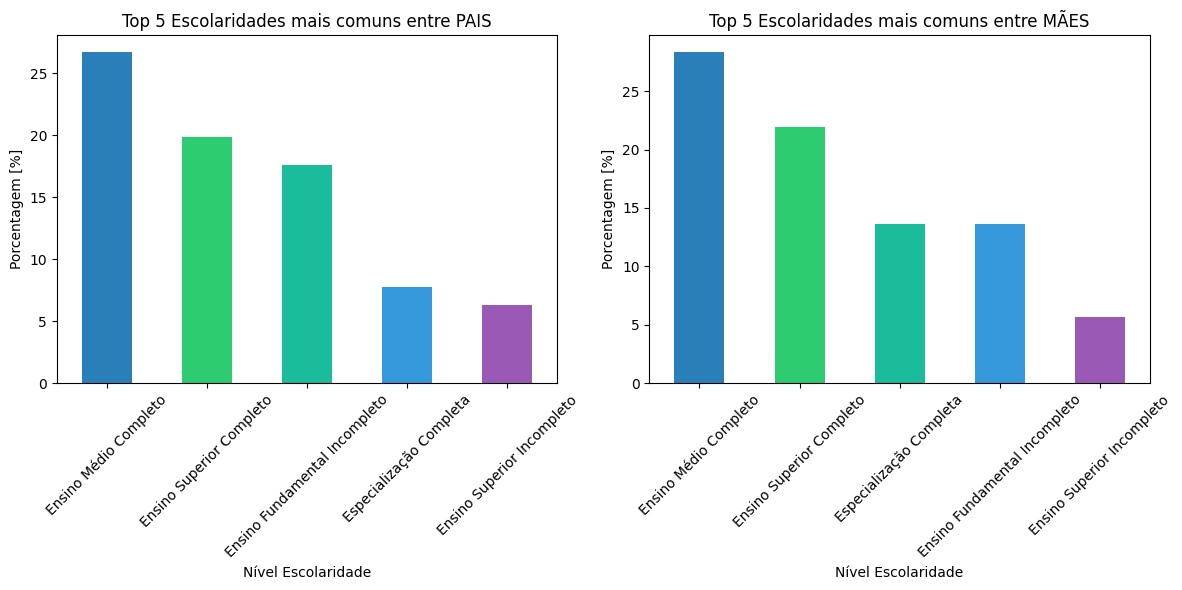

In [163]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
color=['#2980B9', '#2ECC71', '#1ABC9C', '#3498DB', '#9B59B6']


# ====================================================================================================================

top5_pai = pai_percent.head(5)
top5_pai.plot(kind='bar', color=color, ax=ax[0])
ax[0].set_title('Top 5 Escolaridades mais comuns entre PAIS')
ax[0].set_xlabel('Nível Escolaridade')
ax[0].set_ylabel('Porcentagem [%]')
ax[0].set_xticklabels(top5_pai.index, rotation=45)

# ====================================================================================================================

top5_mae = mae_percent.head(5)
top5_mae.plot(kind='bar', color=color, ax=ax[1])
ax[1].set_title('Top 5 Escolaridades mais comuns entre MÃES')
ax[1].set_xlabel('Nível Escolaridade')
ax[1].set_ylabel('Porcentagem [%]')
ax[1].set_xticklabels(top5_mae.index, rotation=45)

plt.tight_layout()
plt.show()